# INTRODUCTION


Doing analsis on the Olympix data of country's with gold, silver, bronze, and total medal won by each country. 

## Data Description

| Variables | Explanation of variable |
| :----- | :----- |
|**name**| name of the player |
|**age**| age of the player |
|**country**| participated country player |
|**year**| olympix game of 2002 to 2012  |
|**Date_Given**| it is the date when game was played |
|**sports**| all game names |
|**gold_medal**| gold medal won by country   |
|**silver_medal**| silver medal won by country |
|**brone_medal**| bronze medal won by country |
|**total_medal**| total medal won by country |

In [101]:
# importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno

## Please do the basic exploration of the data.

In [102]:
# loading data
olympix = pd.read_csv("olympix_data_organized_with_header (1) (1).csv")

In [103]:
olympix.head()        # head of the table

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,08-12-2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10-01-2000,Gymnastics,2,1,3,6


In [104]:
olympix.tail()    # tail of the table

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
8613,Olena Sadovnycha,32.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,10-01-2000,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,10-01-2000,Archery,0,0,1,1
8617,Rod White,23.0,United States,2000,10-01-2000,Archery,0,0,1,1


In [105]:
olympix.info()      # checking the dtype of all column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8613 non-null   object 
 1   age           8613 non-null   float64
 2   country       8618 non-null   object 
 3   year          8618 non-null   int64  
 4   Date_Given    8618 non-null   object 
 5   sports        8618 non-null   object 
 6   gold_medal    8618 non-null   int64  
 7   silver_medal  8618 non-null   int64  
 8   brone_medal   8618 non-null   int64  
 9   total_medal   8618 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 673.4+ KB


In [106]:
olympix.describe(include="all")    # checking all the column min, max, count, top and all

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
count,8613,8613.000000,8618,8618.000000,8618,8618,8618.000000,8618.000000,8618.000000,8618.000000
unique,6955,NaN,110,NaN,7,49,NaN,NaN,NaN,NaN
top,Robert Scheidt,NaN,United States,NaN,8/24/2008,Athletics,NaN,NaN,NaN,NaN
freq,4,NaN,1109,NaN,1872,687,NaN,NaN,NaN,NaN
mean,NaN,26.405434,NaN,2005.978881,NaN,NaN,0.364702,0.363309,0.377698,1.105709
std,NaN,5.102118,NaN,4.289946,NaN,NaN,0.545349,0.511613,0.505005,0.408892
min,NaN,15.000000,NaN,2000.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000
25%,NaN,23.000000,NaN,2002.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000
50%,NaN,26.000000,NaN,2006.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000
75%,NaN,29.000000,NaN,2010.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000


In [107]:
olympix.isnull().sum()       # here we can see the two column name and age both have 5 null values.

name            5
age             5
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

### Deal with missing values appropriately. You can either remove them or fill them, but a proper justification is required.

<AxesSubplot:>

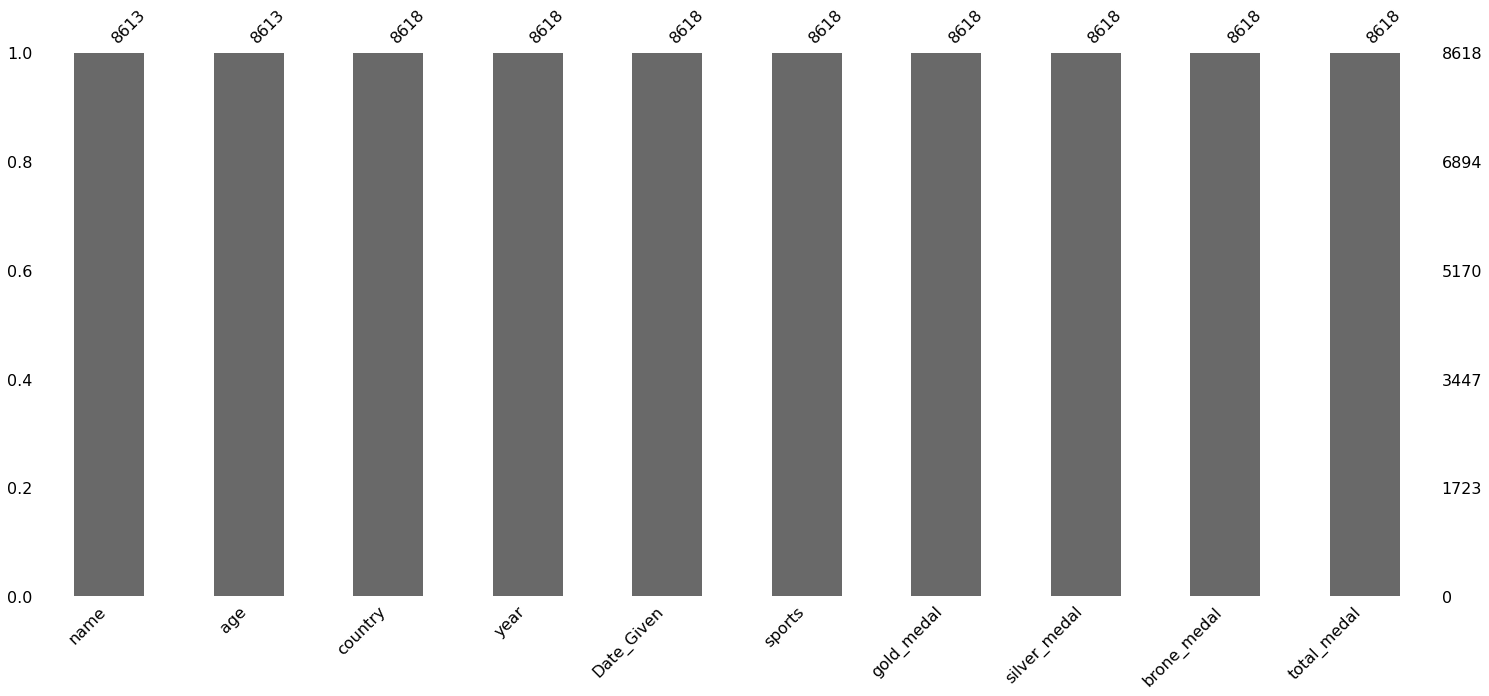

In [108]:
msno.bar(olympix)     # here we can see missing data in graphical terms.
                      # name and age.

In [109]:
# so here i have converted into Nan all the missing rows with the help of regex.

import re    # here importing library

for i in olympix.columns:
    olympix[i][olympix[i].apply(lambda i: True if re.search('^\s*$', str(i)) else False)]=None

<ipython-input-109-f941e00330fc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olympix[i][olympix[i].apply(lambda i: True if re.search('^\s*$', str(i)) else False)]=None


In [110]:
# in the above code i have converted missing or blank values into NaN. 
# here dropping all the rows that don't have the values or name or contain nan values also.
# the purpose of deleting those rows is that doesn't contain or contain less information.
# that's why i removed that rows from the dataFrame.

# using dropna function to remove all nan rows.
olympix = olympix.dropna()
print(olympix)

                      name   age        country  year  Date_Given      sports  \
0           Michael Phelps  23.0  United States  2008   8/24/2008    Swimming   
1           Michael Phelps  19.0  United States  2004   8/29/2004    Swimming   
2           Michael Phelps  27.0  United States  2012  08-12-2012    Swimming   
3         Natalie Coughlin  25.0  United States  2008   8/24/2008    Swimming   
4            Aleksey Nemov  24.0         Russia  2000  10-01-2000  Gymnastics   
...                    ...   ...            ...   ...         ...         ...   
8613      Olena Sadovnycha  32.0        Ukraine  2000  10-01-2000     Archery   
8614      Kateryna Serdiuk  17.0        Ukraine  2000  10-01-2000     Archery   
8615      Wietse van Alten  21.0    Netherlands  2000  10-01-2000     Archery   
8616  Sandra Wagner-Sachse  31.0        Germany  2000  10-01-2000     Archery   
8617             Rod White  23.0  United States  2000  10-01-2000     Archery   

      gold_medal  silver_me

In [111]:
olympix.isnull().sum()   # checking all null values.
                         # so here is no null values.

name            0
age             0
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

## Duplicates in the dataset introduces bias in the study. Please check and perform appropriate steps

In [112]:
# dropping all duplicated values from the data.

olympix.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8613    False
8614    False
8615    False
8616    False
8617    False
Length: 8613, dtype: bool

In [113]:
olympix.duplicated().sum()     # duplicated value is zero.

0

In [117]:
olympix['name'].duplicated().sum()   # checking duplicated name is 1658.

1658

In [118]:
olympix = olympix.drop_duplicates()    # droping duplicated values.

## Please remove special characters from the name column.

In [119]:
# importing string
import string
# calling all ascii letters and string
alphabet = string.ascii_letters+string.punctuation

In [120]:
# removing all the special characters from the dataset.

olympix = olympix.replace('\*a-zA-Z !@#$%_+-=|:<>,.()[]{}',regex=True)

In [121]:
# so, here i am changing dtype of the column.

olympix['sports'] = olympix['sports'].astype('category')
olympix['age'] = olympix['age'].astype('int')

## Perform data visualization techniques to appropriate columns and explain them. 

<AxesSubplot:xlabel='total_medal', ylabel='year'>

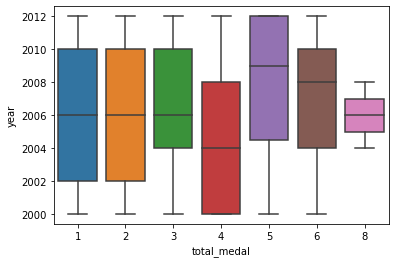

In [125]:
# here i am comparing year with total_medal.
# so, we can see that the upper whisker of all total_medal and there is no outliers.
# the highest medal is won in between 2005 to 2007.
# so, we can see the year with comparing total_medal.

sns.boxplot(x='total_medal',y='year',data=olympix)

<AxesSubplot:xlabel='total_medal', ylabel='age'>

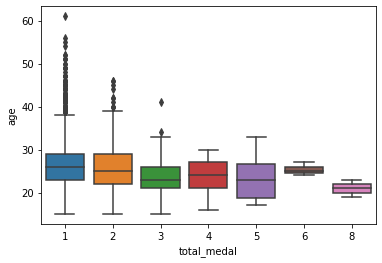

In [126]:
# here i am comparing total_medal with age.
# so the highest oulier is in "1" total_medal. the highest ouliers in "1" category is above 60.
# we can see the highest medal which is 8 won age group is 20 to 24.

sns.boxplot(x='total_medal',y='age',data=olympix)

<AxesSubplot:xlabel='gold_medal', ylabel='age'>

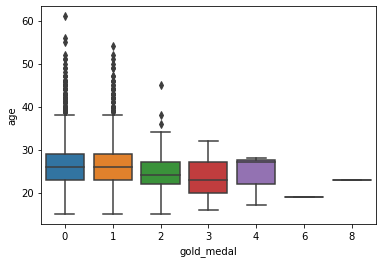

In [128]:
# here i am comparing gold_medal with age column.
# the highest outlier is in 0.
# so, we can see which age group have won the medal.
# the highest medal won age group is 25. 

sns.boxplot(x='gold_medal',y='age',data=olympix)

## Please check if the age dataset is skewed or symmetric. Based on results perform transformation.

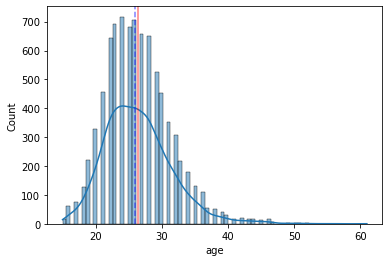

In [129]:
# here i am checking skewness in age column.
# age attribute is skewed.
# it is positively skewed or moving toward the right.
# the mean and median line is cllose to each other.
# and the outliers are high here.

sns.histplot(data=olympix['age'],kde=True)
plt.axvline(x=olympix.age.mean(),c="red", alpha=0.5, label="mean")
plt.axvline(x=olympix.age.median(),c="blue", alpha=0.5, ls="--", label="median")

## Please perform appropriate numerical measures on each column and report them accordingly.

<AxesSubplot:xlabel='year', ylabel='gold_medal'>

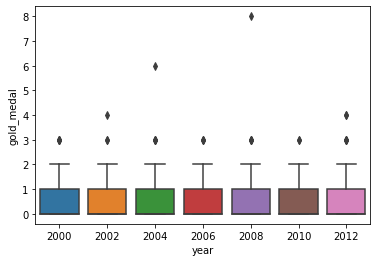

In [132]:
# here i am comparing year with gold_medal.
# according to me, the highest oulier is in 2008.
# the mostly won medal is 2 in every year.

sns.boxplot(x='year',y='gold_medal',data=olympix)

<AxesSubplot:xlabel='silver_medal', ylabel='year'>

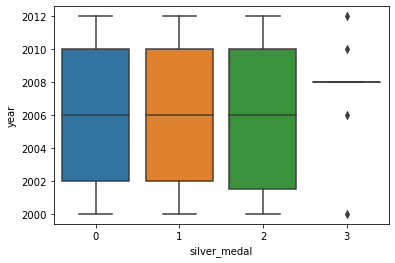

In [134]:
# here i am comparing year with silver_medal.
# the highest outlier is in 3.
# 0,1,2 silver_medal is normal in every year. 

sns.boxplot(x='silver_medal',y='year',data=olympix)

<AxesSubplot:xlabel='brone_medal', ylabel='year'>

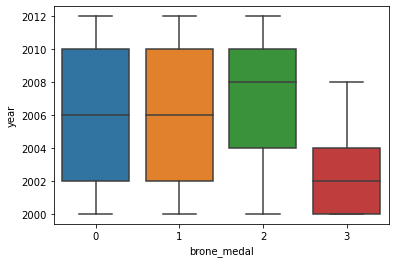

In [137]:
# here i am comparing year with brone_medal. here i am using boxplot plot
# in the brone_medal 0,1,2 is normal.
# the upper whisker is same in 0,1,2 but in 3 is less which is 2008.

sns.boxplot(x='brone_medal',y='year',data=olympix)

<AxesSubplot:xlabel='year', ylabel='total_medal'>

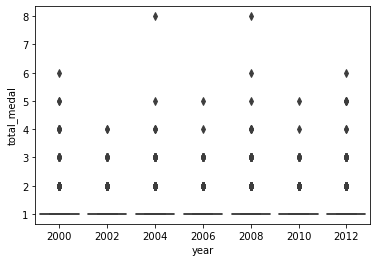

In [138]:
# here i am checking total_medal won in the year.
# according to me boxplot is best to understand outliers and all.
# in 2004 and 2008 is the year the oulier is high which is 8 total_medal.
# the less ouliers is in 2002.

sns.boxplot(x='year',y='total_medal',data=olympix)

## Please list the top 10 countries with the gold medal, then top10 countries with the silver medal, then bronze medal and the total medal.

#### top 10 countries with the gold medal

In [139]:
top_gold = olympix[["country","gold_medal"]]   # selecting country and gold_medal column.

In [140]:
top_gold.nlargest(10,"gold_medal")     # finding 10 largest in gold_medal.

,country,gold_medal
0,United States,8
1,United States,6
2,United States,4
6,United States,4
34,Norway,4
8,United States,3
10,Australia,3
14,Norway,3
20,Australia,3
22,Netherlands,3


#### top 10 countries with the silver medal

In [141]:
top_silver = olympix[["country","silver_medal"]]    # selecting country and silver_medal column.

In [142]:
top_silver.nlargest(10,"silver_medal")              # finding 10 largest in silver_medal.

,country,silver_medal
5,Australia,3
13,United States,3
16,Zimbabwe,3
25,Australia,3
30,United States,3
50,Hungary,3
64,United States,3
103,United States,3
138,Germany,3
2,United States,2


#### top 10 countries with the bronze medal.

In [143]:
top_bronze = olympix[["country","brone_medal"]]       # selecting country and brone_medal column.

In [144]:
top_bronze.nlargest(10,"brone_medal")                 # finding 10 largest in brone_medal.

,country,brone_medal
3,United States,3
4,Russia,3
11,United States,3
66,Germany,3
106,Austria,3
1,United States,2
12,Canada,2
18,United States,2
19,Netherlands,2
27,Netherlands,2


#### top 10 countries with the total medal.

In [145]:
top_total = olympix[["country","total_medal"]]       # selecting country and total_medal column.

In [146]:
top_total.nlargest(10,"total_medal")                 # finding 10 largest in total_medal.

,country,total_medal
0,United States,8
1,United States,8
2,United States,6
3,United States,6
4,Russia,6
5,Australia,5
6,United States,5
7,United States,5
8,United States,5
9,United States,5
